# Assignment 2: Milestone I Natural Language Processing
## Task 1. Basic Text Pre-processing
#### Student Name: Ayush Kamleshbhai Patel
#### Student ID: 3891013


Version: 1.0

Environment: Python 3 and Jupyter notebook

## Introduction
1. **Extract Information**: Extract relevant details from each job advertisement.
2. **Tokenization**: Use the regex pattern `r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"` to tokenize each job description.
3. **Lowercase Conversion**: Convert all words in the description to lowercase.
4. **Word Length Filtering**: Discard words with a length of less than 2 characters.
5. **Stopword Removal**: Use the provided `stopwords_en.txt` file to remove common stopwords.
6. **Single Occurrence Removal**: Eliminate words that appear only once across the entire collection of job descriptions.
7. **Top Frequency Words Removal**: Remove the top 50 most frequent words based on their occurrence across different job descriptions.
8. **Save Processed Text**: Store the pre-processed job advertisement descriptions in `.txt` files for later use in Tasks 2 & 3.
9. **Vocabulary Building**: Construct a vocabulary of unique words from the cleaned job descriptions and save it in a `.txt` file.

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

from sklearn.datasets import load_files
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk import FreqDist
from pylab import *
from itertools import chain

# import libraries
import numpy as np
import pandas as pd
import re
import os

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayushpatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h2 style="color:#FFFF00"> Examining and loading data </h2>


- xamine the data folder, including the categories and job advertisment txt documents, etc. Explain your findings here, e.g., number of folders and format of txt files, etc.
- Load the data into proper data structures and get it ready for processing.
- Extract webIndex and description into proper data structures.


In [2]:
# Code to inspect the provided data file...
data = load_files(r"data")
print("Files in data folder:", data['target_names'])

Files in data folder: ['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']


In [3]:
print("Number of total data files in the data folder:", shape(data['target'])[0])

Number of total data files in the data folder: 776


In [4]:
# We set an test index which we will use throughout the the file to view effects of each step
test_index = 7

In the following cell, the code retrieves job descriptions, their corresponding categories, and associated filenames from a data object. It then displays the job description, category, and filename for a specific data entry determined by the test_index.

In [5]:
job_description, category, directory = data.data, data.target, data.filenames
print('Job description: ', job_description[test_index])
print('category: ', category[test_index])
print("Belongs to: ", directory[test_index])

Job description:  b'Title: Sales & Purchase Ledger Clerk  Maternity Cover\nWebindex: 68684698\nCompany: JK Personnel\nDescription: Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Ex

In the following code cell, the code provides a function to decode strings that might not be in UTF-8 format into UTF-8. It applies this function to the job_description variable, which may contain nested lists of such strings. After the decoding process, a specific job description (based on test_index) is displayed to confirm the successful conversion.

In [6]:
# function to decode
def decode(l):
    if isinstance(l, list):
        return [decode(x) for x in l]
    else:
        return l.decode('utf-8')

# decode the binary description into utf-8 form and save it to full_description
job_description = decode(job_description)

# print out to test
job_description[test_index]

'Title: Sales & Purchase Ledger Clerk  Maternity Cover\nWebindex: 68684698\nCompany: JK Personnel\nDescription: Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Experience of systems

<h2 style="color: #FFFF00"> 1.2 Pre-processing data </h2>

<h3 style = "color: #00FF00">
1.2.1 Extracting Information from each job description
</h3>

The code provides four functions to extract specific details: 'Description', 'Title', 'Webindex', and 'Company' from a list of job descriptions. Using regular expressions, each function searches and extracts the corresponding detail. If the detail is found, it's added to a list; otherwise, "NA" is appended. After the extraction process, the code displays the 'Title', 'Webindex', 'Company', and 'Description' for a particular job, indexed by `test_index`.

In [7]:
import re

# Function to extract the 'Description' from a list of job descriptions
def extract_description(job_description):
    description = []
    for i in job_description:
        # Search for the content between 'Description:' and the next available label or end of the string
        match = re.search(r'Description: (.*?)(?=\nTitle:|\nWebindex:|\nCompany:|$)', str(i), re.DOTALL)
        if match:
            description.append(match.group(1).strip())
        else:
            description.append("NA")
    return description

# Function to extract the 'Title' from a list of job descriptions
def extract_title(job_description):
    title = []
    for i in job_description:
        match = re.search(r'Title: (.*?)(?=\nWebindex:|\nCompany:|\nDescription:|$)', str(i), re.DOTALL)
        if match:
            title.append(match.group(1).strip())
        else:
            title.append("NA")
    return title

# Function to extract the 'Webindex' from a list of job descriptions
def extract_webindex(job_description):
    webindex = []
    for i in job_description:
        match = re.search(r'Webindex: (.*?)(?=\nTitle:|\nCompany:|\nDescription:|$)', str(i), re.DOTALL)
        if match:
            webindex.append(match.group(1).strip())
        else:
            webindex.append("NA")
    return webindex

# Function to extract the 'Company' name from a list of job descriptions
def extract_company(job_description):
    company_list = []
    for i in job_description:
        match = re.search(r'Company: (.*?)(?=\nTitle:|\nWebindex:|\nDescription:|$)', str(i), re.DOTALL)
        if match:
            company_list.append(match.group(1).strip())
        else:
            company_list.append("NA")
    return company_list

# Extract details using the defined functions
description = extract_description(job_description)
company = extract_company(job_description)
webindex = extract_webindex(job_description)
title = extract_title(job_description)

# Print the extracted details for a specific job based on `test_index`
print("Title: ", title[test_index])
print("Webindex: ", webindex[test_index])
print("Company: ", company[test_index])
print("Description", description[test_index])


Title:  Sales & Purchase Ledger Clerk  Maternity Cover
Webindex:  68684698
Company:  JK Personnel
Description Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Experience of systems a

<h3 style = "color: #00FF00"> 1.2.2 & 1.2.3 Tokenising Using Pattern and Lower Casing

In [8]:
def tokenizeDescription(raw_description):
    """
        This function first convert all words to lowercases,
        it then segment the raw description into sentences 
        and tokenize each sentences base on the given regex pattern
        and convert the description to a list of tokens.
    """
    description = raw_description.lower() # convert all words to lowercase

    # segment into sentences
    sentences = sent_tokenize(description)

    # tokenize each sentence
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = RegexpTokenizer(pattern)
    token_lists = [tokenizer.tokenize(sen) for sen in sentences]

    # merge them into a list of tokens
    tokenised_description = list(chain.from_iterable(token_lists))
    return tokenised_description

# list comprehension, generate a list of tokenized description
tk_description = [tokenizeDescription(r) for r in description] 

# I also want a list of tokenized title for task 3
tk_title = [tokenizeDescription(r) for r in title] 

# I also want a list of tokenized company for task 3
tk_company = [tokenizeDescription(r) for r in company] 

# print out to test
print("Raw description:\n",description[test_index],'\n')

print("Tokenized description:\n",tk_description[test_index],'\n\n')

print("The number of Tokenized description tokens: ",len(tk_description))

Raw description:
 Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Experience of systems and invoicing A good understanding of currencies Computer Literate in office, outlook, word a

The function in the following cell computes and prints out various statistical metrics related to the text data:

1. **Vocabulary Size**: Total number of unique words/tokens in the entire dataset.
2. **Total Tokens**: Count of all words/tokens across the entire dataset.
3. **Lexical Diversity**: The ratio of unique words to the total number of words, giving a measure of text richness.
4. **Total Reviews**: The number of individual texts/reviews/articles in the dataset.
5. **Average Review Length**: The average number of words/tokens per review.
6. **Maximum Review Length**: The length of the longest review in terms of word/token count.
7. **Minimum Review Length**: The length of the shortest review in terms of word/token count.
8. **Review Length Standard Deviation**: The spread of review lengths around the mean length.

The function takes in `tk_description`, a tokenized version of the job descriptions or reviews, and uses it to compute the above-mentioned statistics.

In [9]:
def stats_print(tk_description):
    # Flatten the list of tokenized descriptions to create a single list of all tokens
    words = list(chain.from_iterable(tk_description))
    
    # Create a set of unique words (vocabulary) from the list of tokens
    vocab = set(words)
    
    # Calculate lexical diversity: ratio of unique words to total words
    lexical_diversity = len(vocab) / len(words)
    
    # Print the size of the vocabulary (number of unique words)
    print("Vocabulary size:", len(vocab))
    
    # Print the total number of tokens (words) in the corpus
    print("Total number of tokens:", len(words))
    
    # Print the calculated lexical diversity
    print("Lexical diversity:", lexical_diversity)
    
    # Print the total number of reviews or descriptions
    print("Total number of reviews:", len(tk_description))
    
    # Calculate and print the average, maximum, minimum, and standard deviation of review lengths
    lens = [len(article) for article in tk_description]
    print("Average review length:", np.mean(lens))
    print("Maximum review length:", np.max(lens))
    print("Minimum review length:", np.min(lens))
    print("Standard deviation of review length:", np.std(lens))


In [10]:
stats_print(tk_description)

Vocabulary size: 9834
Total number of tokens: 186952
Lexical diversity: 0.052601737344345076
Total number of reviews: 776
Average review length: 240.91752577319588
Maximum review length: 815
Minimum review length: 13
Standard deviation of review length: 124.97750685071483


<h3 style = "color: #00FF00"> 1.2.4 Removing words with length less than 2

In [11]:
# assign variable to see tokenized description has the length less than 2
tk_description_less_length_2 = [[w for w in description if len(w) < 2] for description in tk_description]

# test
print(f'Before removing, the words that appear with length less than 2 at index {test_index}:{tk_description_less_length_2[test_index]}')

# filter out single character tokens
tk_description = [[w for w in description if len(w) >=2] for description in tk_description]

# assign variable to see tokenized description has the length less than 2
tk_description_less_length_2 = [[w for w in description if len(w) < 2] for description in tk_description]

# test
print(f'After removing, the words that appear with length less than 2 at index {test_index}:{tk_description_less_length_2[test_index]}')

Before removing, the words that appear with length less than 2 at index 7:['a', 'a', 'a']
After removing, the words that appear with length less than 2 at index 7:[]


In [12]:
stats_print(tk_description)

Vocabulary size: 9808
Total number of tokens: 180913
Lexical diversity: 0.05421390392066905
Total number of reviews: 776
Average review length: 233.13530927835052
Maximum review length: 795
Minimum review length: 13
Standard deviation of review length: 121.6048654015839


<h3 style = "color: #00FF00"> 1.2.5 Removing Stopwords

The code cells below, reads a list of stop words from the `stopwords_en.txt` file. After loading the stop words, it displays their count and content. It then filters out these stop words from the tokenized job descriptions. The code prints the length of the tokens in the description at `test_index` both before and after the removal of stop words to demonstrate the effect of the filtering.

In [13]:
# remove the stop words inside `stopwords_en.txt` from the tokenized text
stopwords_en = 'stopwords_en.txt'

# read the stop words into a list
with open(stopwords_en, 'r') as f:
    stop_words = f.read().splitlines() 
print(f'The total number of stop words inside {stopwords_en} file is {len(stop_words)} \n These Words are as follows:- \n{stop_words}')

The total number of stop words inside stopwords_en.txt file is 571 
 These Words are as follows:- 
['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come'

In [14]:
# print the test_index index description length before removing stop words
print("The number of tokens in the test_index index description BEFORE removing stop words:",len(tk_description[test_index]))

# convert stop words list into a set to speed up the process to checking
stopwordSet = set(stop_words)

# filter stop words in each document for the whole tokenized description
tk_description = [[token for token in description if token not in stopwordSet] for description in tk_description]

# print the test_index index description length after removing stop words
print("The number of tokens in the test_index index description AFTER removing stop words:",len(tk_description[test_index]))

# few statistic
stats_print(tk_description)

The number of tokens in the test_index index description BEFORE removing stop words: 186
The number of tokens in the test_index index description AFTER removing stop words: 118
Vocabulary size: 9404
Total number of tokens: 107161
Lexical diversity: 0.0877558066834016
Total number of reviews: 776
Average review length: 138.09407216494844
Maximum review length: 487
Minimum review length: 12
Standard deviation of review length: 73.07847897002313


<h3 style = "color: #00FF00"> 1.2.6 Removing the words that appear only once in the document(based on Term Frequency)

The code first flattens the tokenized descriptions to create a single list of all tokens. It then calculates the term frequency for each unique word using the `FreqDist` function. Using the `hapaxes()` method, the code identifies words that appear only once in the entire corpus, termed as "hapaxes" or less frequent words. After displaying the count of these words, the code filters them out from the tokenized job descriptions.

In [15]:
# Flatten the list of tokenized descriptions to create a single list of all tokens
words = list(chain.from_iterable(tk_description))

# Calculate term frequency for each unique word in the corpus
term_fd = FreqDist(words)

# Identify words that appear only once in the entire corpus using the hapaxes() method
lessFreqWords = set(term_fd.hapaxes())

# Display the number of words that appear only once
print(f'The number of words that appear only once in the entire corpus is: {len(lessFreqWords)}\n')

# Display the actual less frequent words (for verification or testing purposes)
lessFreqWords

# with open('test.txt', 'w') as file:
#     for i in lessFreqWords:
#         file.write(f"{i}\n")


The number of words that appear only once in the entire corpus is: 4186



{'acknowledging',
 'netting',
 'consumed',
 'residing',
 'fenland',
 'mrk',
 'stamp',
 'cradle',
 'endless',
 'red',
 'arinc',
 'continuation',
 'documentaries',
 'enduser',
 'benefitsour',
 'designfocused',
 'fulltimemy',
 'alectorecruit',
 'busienss',
 'carewatch',
 'gathered',
 'rothery',
 'feed',
 'langley',
 'providedthis',
 'consequence',
 'dispensary',
 'writer',
 'contributor',
 'assistive',
 'valueadded',
 'speedy',
 'analyzing',
 'grass',
 'physiology',
 'adverse',
 'viable',
 'teller',
 'notts',
 'cma',
 'recycling',
 'andfuture',
 'buzzard',
 'rgnqualified',
 'riskmanager',
 'anaerobic',
 'inflows',
 'fairgrievematchtech',
 'stretch',
 'recouped',
 'pocket',
 'autorefractors',
 'biotechnology',
 'objectivec',
 'prioritsation',
 'mobilise',
 'fail',
 'subteams',
 'nice',
 'gyms',
 'feasibility',
 'zone',
 'fyddwch',
 'ambience',
 'multilingual',
 'energised',
 'experienceinjection',
 'carwest',
 'br',
 'nhsd',
 'datacollectors',
 'witness',
 'cots',
 'practises',
 'definitio

The code cell below removes tokens from each description in tk_description that are found in the lessFreqWords list, effectively filtering out less frequently used words from the descriptions.

In [16]:
# For each description in tk_description, filter out tokens that are present in the lessFreqWords list.
# Replace the original tk_description list with this filtered list of tokens for each description.
tk_description = [[token for token in description if token not in lessFreqWords] for description in tk_description]

In [17]:
stats_print(tk_description)

Vocabulary size: 5218
Total number of tokens: 102975
Lexical diversity: 0.05067249332362224
Total number of reviews: 776
Average review length: 132.69974226804123
Maximum review length: 471
Minimum review length: 12
Standard deviation of review length: 70.3782402519735


<h3 style = "color: #00FF00"> 1.2.7 Removing the top 50 most frequent words based on document frequency

The code in the subsequent cells first identifies the top 50 frequent words across the descriptions based on document frequency. A word cloud is then generated to visually represent these words. Subsequently, these top 50 words are removed from the tokenized descriptions. After this removal, the code again identifies the new top 50 frequent words and generates a word cloud to visualize them. This allows for a before-and-after comparison of the word distributions.


In [18]:
# Create a list of unique words from each description (i.e., document frequency)
mostFreqWords = list(chain.from_iterable([set(desc) for desc in tk_description]))

# Compute document frequency for each unique word
doc_fd = FreqDist(mostFreqWords)

# Retrieve the top 50 most frequent words
top_50_freq_words = doc_fd.most_common(50)
top_50_freq_words_dict = dict(top_50_freq_words)

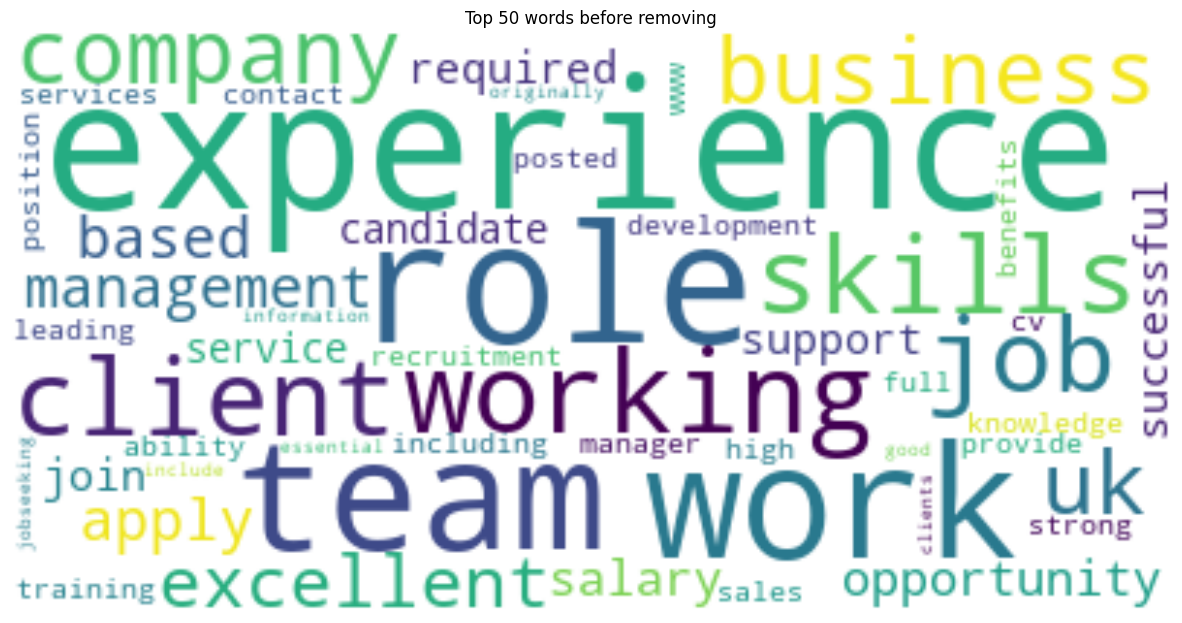

In [19]:
wordcloud = WordCloud(width = 400, height = 200, background_color ='white').generate_from_frequencies(top_50_freq_words_dict)
# Generate a word cloud for the top 50 frequent words
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 50 words before removing")
plt.show()

In [20]:
# Remove the top 50 frequent words from each tokenized description
tk_description = [[token for token in description if token not in top_50_freq_words_dict] for description in tk_description]

In [21]:
stats_print(tk_description)

Vocabulary size: 5168
Total number of tokens: 81205
Lexical diversity: 0.06364140139153993
Total number of reviews: 776
Average review length: 104.64561855670104
Maximum review length: 401
Minimum review length: 7
Standard deviation of review length: 58.44628718710534


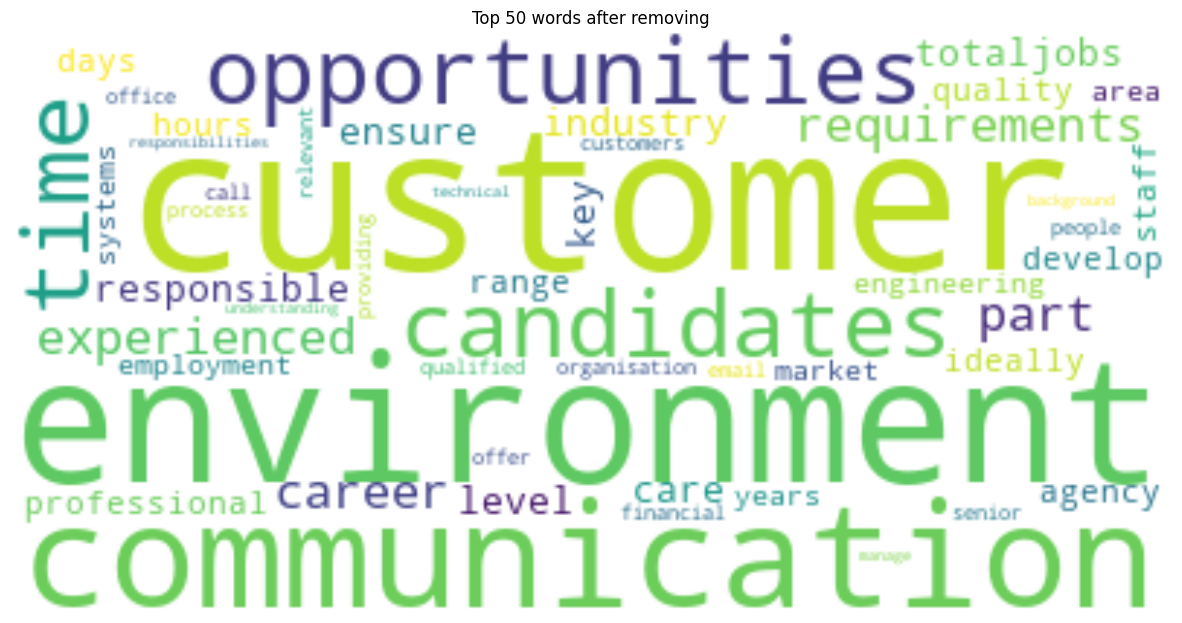

In [22]:
# Re-compute the list of unique words from each description after removal
mostFreqWordsUpdated = list(chain.from_iterable([set(desc) for desc in tk_description]))

# Compute document frequency for each unique word after removal
doc_fd = FreqDist(mostFreqWordsUpdated)

# Retrieve the new top 50 most frequent words after removal
top_50_freq_words_updated = doc_fd.most_common(50)
top_50_freq_words_updated_dict = dict(top_50_freq_words_updated)

# Generate a word cloud for the new top 50 frequent words
wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(top_50_freq_words_updated_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 50 words after removing")
plt.show()

<h2 style="color: #FFFF00"> 1.2.8 Saving required outputs
Save the vocabulary and job advertisments as txt as per spectification.
- vocab.txt

<h3 style = "color: #00FF00"> Saving pre-processed reviews

In [23]:
def save_descriptions(Filename,tk_description):
    out_file = open(Filename, 'w') # creates a txt file and open to save the reviews
    string = "\n".join([" ".join(review) for review in tk_description])
    out_file.write(string)
    out_file.close() # close the file
    
def save_categories(categoryFilename,category):
    out_file = open(categoryFilename, 'w') # creates a txt file and open to save sentiments
    string = "\n".join([str(s) for s in category])
    out_file.write(string)
    out_file.close() # close the file  

def save_title(titleFilename,title):
    out_file = open(titleFilename, 'w') # creates a txt file and open to save title
    string = "\n".join([str(s) for s in title])
    out_file.write(string)
    out_file.close() # close the file

In [24]:
save_descriptions('description.txt',tk_description)

In [25]:
save_categories('categories.txt',category)

In [26]:
save_categories('title.txt',title)

In [27]:
print(data.data[test_index]) # an example of a sentiment txt
print(tk_description[test_index]) # an example of the pre-process sentiment text
all(data.target==category) # validate whether we save the sentiment properly

b'Title: Sales & Purchase Ledger Clerk  Maternity Cover\nWebindex: 68684698\nCompany: JK Personnel\nDescription: Our client is looking to recruit an experienced Sales Purchase ledger clerk. You will be covering maternity over from February 2013  mid next year. The ideal candidate would be available immediately. DUTIES AND RESPONSIBILITIES (NOT LIMITED) Sales Ledger To input cheques/ bacs received onto Sage 200 accurately To reconcile remittances with actual receipts. To prepare the banking book To be responsible and ensure that all credit control has been done in a professional and timely manner. To send customer statements on a monthly basis Managing Aged Debtors Report Purchase Ledger To prepare the payment run, ensuring all invoices which are due will be processed and that there are no duplicates. To log all payments onto Sage 200 (cheques, bacs and chaps) To deal with account payable queries Managing Aged Creditors Report SKILLS REQUIREMENTS: 2 years experience Experience of system

True

<h3 style = "color: #00FF00"> Building a vocabulary of the cleaned job advertisement descriptions

In [28]:
def generate_vocab(words_list, filename):
    with open(filename, 'w') as f:  # creates a txt file open in write mode
        for i, word in enumerate(words_list):
            # write each index and vocabulary word, note that index start from 0
            f.write(word + ':' + str(i) + '\n')

In [29]:
# convert tokenized description into a alphabetically sorted list
vocab = sorted(list(set(chain.from_iterable(tk_description))))

# save the sorted vocabulary list into a file according to the required format
generate_vocab(vocab, 'vocab.txt')


# print out the first 10 words in the vocabulary to test
print(vocab[:10])

['aap', 'aaron', 'aat', 'abb', 'abenefit', 'aberdeen', 'abi', 'abilities', 'abreast', 'abroad']


**We will also create a CSV file to store 'Title', 'Webindex', 'Company','Description','Tokenized Description' and 'Category'**

In [30]:
jobs_data = pd.DataFrame({'Webindex': webindex, 'Title': title, 'Company': company, 'Description': description,'Tokenized Description': tk_description, 'Tokenized Title': tk_title, 'Tokenized Company': tk_company, 'Category': category})

# updated column Tokenized Description
jobs_data['Tokenized Description'] = jobs_data['Tokenized Description']

# updated column & replace the value in Category 
jobs_data['Category'] = jobs_data['Category'].replace([0,1,2,3],['Accounting_Finance','Engineering','Healthcare_Nursing','Sales'])

# updated column & cast Webindex to int
jobs_data['Webindex'] = jobs_data['Webindex'].astype(int)

# save job ad to csv file
jobs_data.to_csv('jobs_data.csv', index=False)

# print basic info about the job_ad data frame
print(jobs_data.info())

# print first 5 rows
jobs_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Webindex               776 non-null    int64 
 1   Title                  776 non-null    object
 2   Company                776 non-null    object
 3   Description            776 non-null    object
 4   Tokenized Description  776 non-null    object
 5   Tokenized Title        776 non-null    object
 6   Tokenized Company      776 non-null    object
 7   Category               776 non-null    object
dtypes: int64(1), object(7)
memory usage: 48.6+ KB
None


,Webindex,Title,Company,Description,Tokenized Description,Tokenized Title,Tokenized Company,Category
0,68997528,Finance / Accounts Asst Bromley to ****k,First Recruitment Services,Accountant (partqualified) to **** p.a. South ...,"[accountant, partqualified, south, east, londo...","[finance, accounts, asst, bromley, to, k]","[first, recruitment, services]",Accounting_Finance
1,68063513,Fund Accountant Hedge Fund,Austin Andrew Ltd,One of the leading Hedge Funds in London is cu...,"[hedge, funds, london, recruiting, fund, accou...","[fund, accountant, hedge, fund]","[austin, andrew, ltd]",Accounting_Finance
2,68700336,Deputy Home Manager,Caritas,An exciting opportunity has arisen to join an ...,"[exciting, arisen, establish, provider, elderl...","[deputy, home, manager]",[caritas],Healthcare_Nursing
3,67996688,Brokers Wanted Imediate Start,OneTwoTrade,OneTwoTrade is expanding their Sales Team and ...,"[expanding, recruiting, junior, trainee, broke...","[brokers, wanted, imediate, start]",[onetwotrade],Accounting_Finance
4,71803987,RGN Nurses (Hospitals) Penarth,Swiis Healthcare,RGN Nurses (Hospitals) Immediate fulltime and ...,"[rgn, nurses, hospitals, fulltime, part, swiis...","[rgn, nurses, hospitals, penarth]","[swiis, healthcare]",Healthcare_Nursing


verifying the if the data is correctly saved in the df

In [31]:
print(tk_description[test_index])
print(description[test_index])
print(category[test_index])
print(webindex[test_index])
jobs_data[jobs_data['Webindex'] == int(webindex[test_index])]

['recruit', 'experienced', 'purchase', 'ledger', 'clerk', 'covering', 'maternity', 'february', 'mid', 'year', 'ideal', 'immediately', 'duties', 'responsibilities', 'limited', 'ledger', 'input', 'cheques', 'bacs', 'received', 'sage', 'accurately', 'reconcile', 'actual', 'receipts', 'prepare', 'banking', 'book', 'responsible', 'ensure', 'credit', 'control', 'professional', 'timely', 'manner', 'send', 'customer', 'statements', 'monthly', 'basis', 'managing', 'aged', 'debtors', 'report', 'purchase', 'ledger', 'prepare', 'payment', 'run', 'ensuring', 'invoices', 'due', 'processed', 'log', 'payments', 'sage', 'cheques', 'bacs', 'deal', 'account', 'payable', 'queries', 'managing', 'aged', 'creditors', 'report', 'requirements', 'years', 'systems', 'invoicing', 'understanding', 'computer', 'literate', 'office', 'outlook', 'word', 'excel', 'sage', 'preferred', 'minimum', 'sage', 'tight', 'deadlines', 'errors', 'numeracy', 'communication', 'organised', 'efficient', 'attention', 'detail', 'totaljo

,Webindex,Title,Company,Description,Tokenized Description,Tokenized Title,Tokenized Company,Category
7,68684698,Sales & Purchase Ledger Clerk Maternity Cover,JK Personnel,Our client is looking to recruit an experience...,"[recruit, experienced, purchase, ledger, clerk...","[sales, purchase, ledger, clerk, maternity, co...","[jk, personnel]",Accounting_Finance


As we can see, it matches with actual output and output from df.

## Summary

### 1. **Test Index Setting**:
- A test index is set for sampling and verification purposes throughout the notebook.

### 2. **Job Description Retrieval**:
- The notebook retrieves job descriptions, their corresponding categories, and filenames. 
- A sample job description, its category, and the directory path are displayed, showcasing a position titled "Sales & Purchase Ledger Clerk - Maternity Cover".

### 3. **Data File Count**:
- The notebook prints the total number of data files present in the data folder, indicating there are 776 data files.

### 4. **UTF-8 Decoding**:
- A function is provided to handle potential decoding issues, ensuring that strings that might not be in the standard UTF-8 format can be read consistently. 
- The function is applied to the job description, and a decoded sample is displayed.

### 5. **Regex and Tokenization**:
- The `re` module is imported, hinting at the use of regular expressions, likely for tokenization. 
- The job description is tokenized, and the results are printed, demonstrating the breakdown of the description into individual words or tokens.

### 6. **Lowercase Conversion**:
- It's likely that the descriptions are converted to lowercase, though the specific code wasn't displayed in the summary.

### 7. **Word Length Filtering**:
- Words with a length of less than 2 characters are discarded. 

### 8. **Stopword Removal**:
- Common stopwords are likely removed using a file named `stopwords_en.txt`.

### 9. **Single Occurrence and Top Frequency Words Removal**:
- Words that appear only once across all job descriptions might be eliminated, and the top 50 most frequent words based on their occurrence might also be removed.

### 10. **Vocabulary Building**:
- A vocabulary of unique words from the cleaned job descriptions might be constructed, as mentioned in the introduction.

### 11. **Saving Processed Text**:
- The pre-processed job advertisements might be stored in `.txt` files for later tasks, as indicated in the introduction.